# Feature Selection

- 가장 좋은 성능을 보여줄 수 있는 데이터의 부분 집합을 찾아내는 방법
- 모델 생성에 밀접한 데이터의 부분 집합을 선택하여 연산 효율성 및 모델 성능 확보
- 원본 데이터에서 가장 유용한 특징만을 선택 -> 간단한 모델 구성 및 성능 확보

## 필터 선택 방안
- 필터, 래퍼, 임베디드

- 필터: 통계적 점수 부여 선택하는 방법 -> 실행 속도 빠름
- 래퍼: 특징들의 조합을 지도학습 기반 알고리즘에 반복적으로 적용해서 특징 선택 -> 시간 비용 증가가 단점
- 임베디드: 모델 정확도에 기여하는 특징들을 선택 (filter + wrapper) -> 최적의 특징을 선택하는 방법

### 필터

- 카이제곱 필터
- 상관관계 필터

### 래퍼

- 반복적 특징 조합 탐색: 재귀적 특성 제거

### 임베디드

- 트리 계열 모델 기반
- 랜덤포레스트 기반, Feature Importance 기반 (앙상블 기법) 
- 학습과정에서 최적화된 변수 선택
- 중요하지 않은 변수부터 제거

In [71]:
import numpy as np
import pandas as pd

In [72]:
cancer = pd.read_csv('./breast_cancer_data.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [73]:
# ID를 인덱스화
cancer = cancer.set_index('id')
cancer = cancer.dropna(axis=1) # 결측 컬럼 제거
display(cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer.drop(['diagnosis'], axis=1), cancer[['diagnosis']],
                                                    random_state=1)

print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [75]:
train_df = pd.merge(x_train, y_train, left_index=True, right_index=True, how='inner')
train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
925622,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,M
8915,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,B
848406,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.052590,0.1586,0.05922,...,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,M
922577,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399,B
891703,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866674,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.114900,0.2202,0.06113,...,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465,M
869254,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769,B
859717,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,0.1927,0.06487,...,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390,M


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

### 비시각화 기반 컬럼 도출 (눈으로 좋은 feature column 선택)

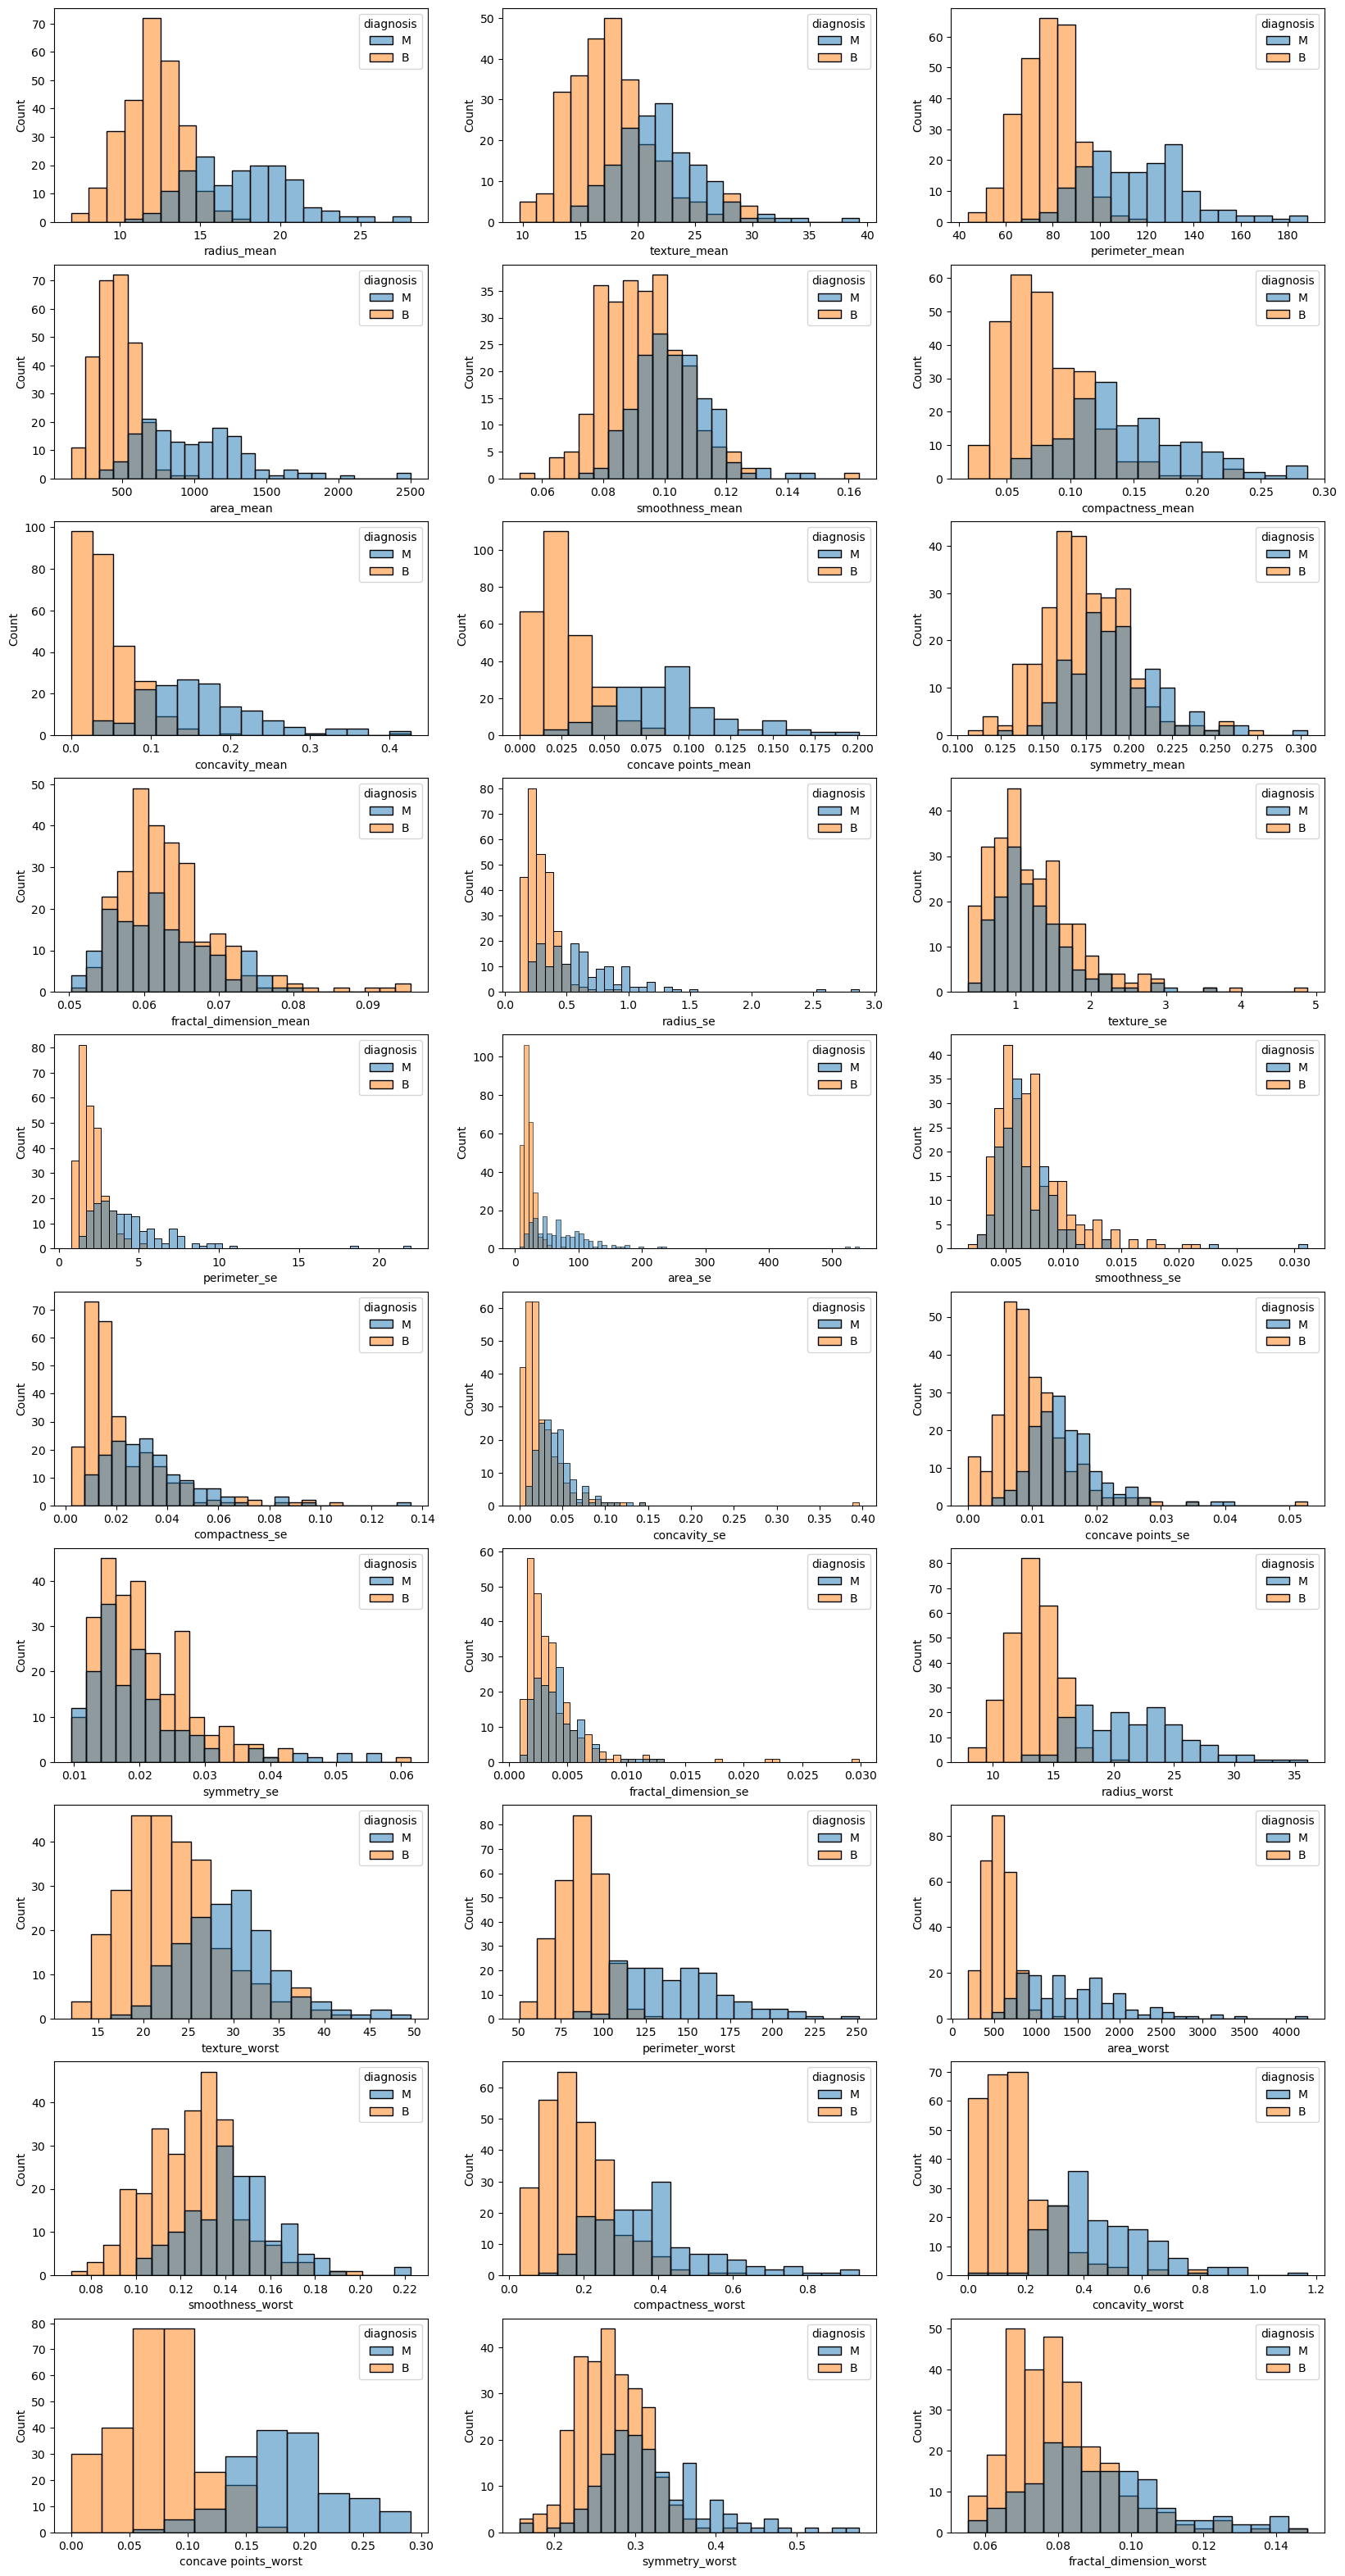

In [77]:
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
axes = axes.flatten()

for i in range(30):
    sns.histplot(data=train_df, x=train_df.columns[i], hue='diagnosis', multiple='layer', ax=axes[i])
    
plt.show()

### RFE (Recursive Feature Elimination)
- 변수 선택 방법으로, 원하는 개수의 변수들이 남을 때까지 학습을 반복하며 유의미하지 않은 변수들을 제거해나가는 Backward 방식

### SVC (Soft Vector Classification) SVM, 서포트 벡터 머신
- 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용

### AUC (Area Under the Curve)

### ROC curve (Receiver Operating Characteristic curve)

### TP, TN, FP, FN

### 민감도(Sensitivity), 특이도(Specificity)

In [78]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [79]:
from sklearn.preprocessing import StandardScaler

# SVM 기반 RFE 수행 <- 스케일에 민감한 특징으로 변수들의 scaling 먼저 진행
scaler = StandardScaler()
scaler.fit(x_train)
scaler_x_train = scaler.transform(x_train)

# FRE 를 적용할 모델 SVM 지정
estimator_mdl = SVC(kernel='linear')
# SVM 학습 기반의 RFE 실행 및 유의미한 개수 지정 : 5개
svm_rfe = RFE(estimator = estimator_mdl, n_features_to_select=5)
svm_rfe_rst = svm_rfe.fit(scaler_x_train, y_train.values.ravel())
svm_rfe_rst.ranking_
# 1 등으로 나오는 변수가 최종 유의미한 특징으로 도출된 컬럼

array([17, 23, 11, 16, 20, 25, 14,  9, 21, 13, 12, 24, 18,  1, 15, 10, 22,
        6, 26,  7,  1,  1,  2,  1, 19,  4,  3,  1,  5,  8])

In [80]:
scale_x_test = scaler.transform(x_test)
prediction = pd.DataFrame(svm_rfe.predict(scale_x_test), columns=['pred_rst'])
prediction

,pred_rst
0,B
1,M
2,B
3,M
4,M
...,...
138,B
139,M
140,M
141,M


In [82]:
# pred_rst 의 B, M 값을 0과 1로 대체
y_test['diagnosis'] = y_test['diagnosis'].replace('M', 1)
y_test['diagnosis'] = y_test['diagnosis'].replace('B', 0)

prediction['pred_rst'] = prediction['pred_rst'].replace('M', 1)
prediction['pred_rst'] = prediction['pred_rst'].replace('B', 0)

In [84]:
# 정확도 확인
from sklearn.metrics import accuracy_score, roc_auc_score

print('accuracy_score', round(accuracy_score(y_test['diagnosis'], prediction['pred_rst']), 5))
print('roc_auc_score', round(roc_auc_score(y_test['diagnosis'], prediction['pred_rst']), 5))

accuracy_score 0.95105
roc_auc_score 0.94659


In [85]:
# 최종 선택된 5개의 feature column 확인
chk_var = []
for name, svm_rfe_rst.ranking_ in zip(x_train.columns, svm_rfe_rst.ranking_):
    lst_chk = [name, svm_rfe_rst.ranking_]
    chk_var.append(lst_chk)
    
chk_svm_rfe = pd.DataFrame(chk_var, columns=['feature_names', 'svm_rfe_feature'])
chk_svm_rfe = chk_svm_rfe[chk_svm_rfe['svm_rfe_feature']==1]
chk_svm_rfe

,feature_names,svm_rfe_feature
13,area_se,1
20,radius_worst,1
21,texture_worst,1
23,area_worst,1
27,concave points_worst,1


### Embedded 기반 특징 선택: RandomForestClassifier

In [86]:
# RF 모형 기반 특징 선택
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [87]:
# RF 모형 생성
embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1))
embedded_rf_selector.fit(scaler_x_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [90]:
# RF 기반 Embedded feature 선택 결과
embedded_rf_support = embedded_rf_selector.get_support()
embedded_rf_feature = x_train.loc[:, embedded_rf_support].columns.tolist()
print(len(embedded_rf_feature), 'selected features')
embedded_rf_feature

9 selected features


['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']